In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [98]:
#Функция строит график прогнозных и реальных значений зависимой переменной

In [99]:
def graphic(prediction, title):
    plt.scatter(dates, y_test,  color='black')
    plt.plot(dates, prediction, color='blue', linewidth=3)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.ylabel('Sales')

In [100]:
#Функция подбирает наиболее подходящее значение гиперпараметра альфа, выводит прогнозные значения исследуемой переменной, коэффициенты модели
#и среднюю ошибку модели

In [101]:
def choice(model):
    alphas = 10**np.linspace(10,-10,100)
    a=1000000
    for alpha in alphas:
        models = model(alpha, normalize = True)
        models.fit(x_train, y_train)             
        pred = models.predict(x_test)
        if a>mean_squared_error(y_test, pred):
            a=mean_squared_error(y_test, pred)
            opt_alpha=alpha

    models = model(alpha = opt_alpha, normalize = True)
    models.fit(x_train, y_train)             
    pred = models.predict(x_test)
    print("Прогнозные значения: \n", pred)
    print("Коэффициенты: \n", models.coef_)
    print("Средняя абсолютная ошибка: ", mean_absolute_error(y_test, pred)) 
    print("Лучшая альфа: ", opt_alpha)
    return pred

In [102]:
#Функция разбивает выборку на тренировочную и тестовую

In [103]:
def spliter():
    x_train = x.loc[:30]
    x_test = x.loc[31:]
    y_train = y.loc[:30]
    y_test = y.loc[31:]
    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

In [104]:
#Функция строит линейную регрессию

In [105]:
def regr():
    reg = LinearRegression().fit(x_train, y_train)
    reg.coef_
    y_pred = reg.predict(x_test)
    return y_pred

In [106]:
#Загружаем данные

In [107]:
dat = pd.read_excel('/Users/juliashaliapina/Documents/work/work.xlsx')

In [108]:
#В данные, помимо имеющихся в условии, были добавлены новые переменные, которые предположительно влияют на зависимую переменную. Так,
#была найдена средняя дневная температура в Дубае за неделю, указано количество праздничных нерабочих дней на неделе, введены фиктивные 
#переменные для зимы,  весны и лета (для осени нет фиктивной переменной из-за мультиколлинеарности), а также подсчитано количество
#каникулярных дней на неделе.

In [109]:
dat.head(10)

,Период продаж,"Средняя цена «ОАЭ ТУР», руб./заказ","Средняя цена конкурента, руб./заказ","Факт продаж, заказов",Количество запросов,Средняя температура днем,Количество праздничных дней,Зима,Весна,Лето,Каникулы
0,28.01.2019 - 03.02.2019,103197.80,125185.20,110.0,7366.295455,27.857143,0,1,0,0,0
1,04.02.2019 - 10.02.2019,107808.30,111489.70,91.0,12549.984848,25.142857,0,1,0,0,0
2,11.02.2019 - 17.02.2019,92518.58,98027.54,93.0,4638.037879,26.714286,0,1,0,0,0
3,18.02.2019 - 24.02.2019,80068.75,98274.79,104.0,6002.166667,25.000000,2,1,0,0,0
4,25.02.2019 - 03.03.2019,97560.45,128452.00,117.0,5456.515152,26.571429,0,1,0,0,0
5,04.03.2019 - 10.03.2019,93533.10,97903.89,71.0,5746.488095,24.714286,3,0,1,0,0
6,11.03.2019 - 17.03.2019,105465.40,111031.70,85.0,9709.583333,27.000000,0,0,1,0,0
7,18.03.2019 - 24.03.2019,103581.30,109069.90,73.0,4953.869048,27.857143,0,0,1,0,2
8,25.03.2019 - 31.03.2019,82913.93,106719.10,91.0,12880.059524,31.857143,0,0,1,0,7
9,01.04.2019 - 07.04.2019,114749.30,93182.47,47.0,5134.080000,37.857143,0,0,1,0,0


In [96]:
dat.describe()

,"Средняя цена «ОАЭ ТУР», руб./заказ","Средняя цена конкурента, руб./заказ","Факт продаж, заказов",Количество запросов,Средняя температура днем,Количество праздничных дней,Зима,Весна,Лето,Каникулы
count,52.000000,52.000000,42.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,106796.362885,105213.737115,67.952381,7713.875411,34.612637,0.500000,0.096154,0.250000,0.250000,2.519231
std,18825.467768,11076.168362,29.807474,3561.983841,6.714455,1.260252,0.297678,0.437237,0.437237,3.262925
min,69152.920000,87243.000000,22.000000,2083.931624,23.714286,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95114.002500,97996.627500,45.250000,4792.997842,27.821429,0.000000,0.000000,0.000000,0.000000,0.000000
50%,104523.350000,103561.950000,67.500000,7462.401061,36.428571,0.000000,0.000000,0.000000,0.000000,0.000000
75%,116300.200000,110679.100000,92.500000,11240.000000,41.178571,0.000000,0.000000,0.250000,0.250000,7.000000
max,168935.100000,135743.500000,125.000000,12880.059524,43.714286,5.000000,1.000000,1.000000,1.000000,7.000000


In [14]:
#Присваиваем колонкам английские названия для удобства

In [15]:
dat.columns = ('period', 'mid_price', 'mid_price_competitor', 'qty', 'demand', 'temp', 'holiday', 'winter', 'spring', 'summer', 'children')

In [16]:
dat.tail(21)

,period,mid_price,mid_price_competitor,qty,demand,temp,holiday,winter,spring,summer,children
31,02.09.2019 - 08.09.2019,110644.80,102882.10,65.0,12524.973856,41.142857,0,0,0,0,0
32,09.09.2019 - 15.09.2019,94664.13,121788.30,101.0,12052.333333,40.571429,0,0,0,0,0
33,16.09.2019 - 22.09.2019,90980.85,105228.10,99.0,11579.692810,40.142857,0,0,0,0,0
34,23.09.2019 - 29.09.2019,102545.00,114407.00,103.0,9380.000000,39.142857,0,0,0,0,0
35,30.09.2019 - 06.10.2019,121821.60,129676.50,109.0,9868.000000,38.714286,0,0,0,0,0
36,07.10.2019 - 13.10.2019,145647.30,115160.80,82.0,10022.000000,38.000000,0,0,0,0,0
37,14.10.2019 - 20.10.2019,143754.80,108358.10,85.0,11935.000000,37.428571,0,0,0,0,0
38,21.10.2019 - 27.10.2019,168935.10,135743.50,88.0,11649.000000,37.000000,0,0,0,0,0
39,28.10.2019 - 03.11.2019,125785.30,121518.20,97.0,10469.000000,35.857143,2,0,0,0,6
40,04.11.2019 - 10.11.2019,103407.40,95927.21,105.0,11138.000000,32.857143,1,0,0,0,0


In [17]:
#В качестве переменной спроса было взято количество запросов по словосочетанию "туры в оаэ" понедельно на wordstat. Для месяцев, для которых отсутствовала
#еженедельная информация, количество запросов за месяц было разделено по неделям на основе данных популярности запроса в Google.Trends:
#(количество запросов за месяц)*(популярность запроса на i неделе)/(сумма баллов популярности запроса за все недели в месяце)

In [18]:
#Округлили количество запросов до целых

In [19]:
dat['demand']=np.round(dat['demand'])
dat.head(10)

,period,mid_price,mid_price_competitor,qty,demand,temp,holiday,winter,spring,summer,children
0,28.01.2019 - 03.02.2019,103197.80,125185.20,110.0,7366.0,27.857143,0,1,0,0,0
1,04.02.2019 - 10.02.2019,107808.30,111489.70,91.0,12550.0,25.142857,0,1,0,0,0
2,11.02.2019 - 17.02.2019,92518.58,98027.54,93.0,4638.0,26.714286,0,1,0,0,0
3,18.02.2019 - 24.02.2019,80068.75,98274.79,104.0,6002.0,25.000000,2,1,0,0,0
4,25.02.2019 - 03.03.2019,97560.45,128452.00,117.0,5457.0,26.571429,0,1,0,0,0
5,04.03.2019 - 10.03.2019,93533.10,97903.89,71.0,5746.0,24.714286,3,0,1,0,0
6,11.03.2019 - 17.03.2019,105465.40,111031.70,85.0,9710.0,27.000000,0,0,1,0,0
7,18.03.2019 - 24.03.2019,103581.30,109069.90,73.0,4954.0,27.857143,0,0,1,0,2
8,25.03.2019 - 31.03.2019,82913.93,106719.10,91.0,12880.0,31.857143,0,0,1,0,7
9,01.04.2019 - 07.04.2019,114749.30,93182.47,47.0,5134.0,37.857143,0,0,1,0,0


In [20]:
x = dat['qty']
y = dat['mid_price']
y_comp = dat['mid_price_competitor']
y_dem = dat['demand']

In [21]:
#Строим графики, чтобы визуально пронаблюдать соотношения переменных
#Из графиков видно, что данные количество заказов-цена сильно зашумлены, и сразу сложно выделить какой-либо паттерн. В то же время
# наблюдается прямая зависимость между количеством заказов и ценой конкурента, а также рыночным спросом.

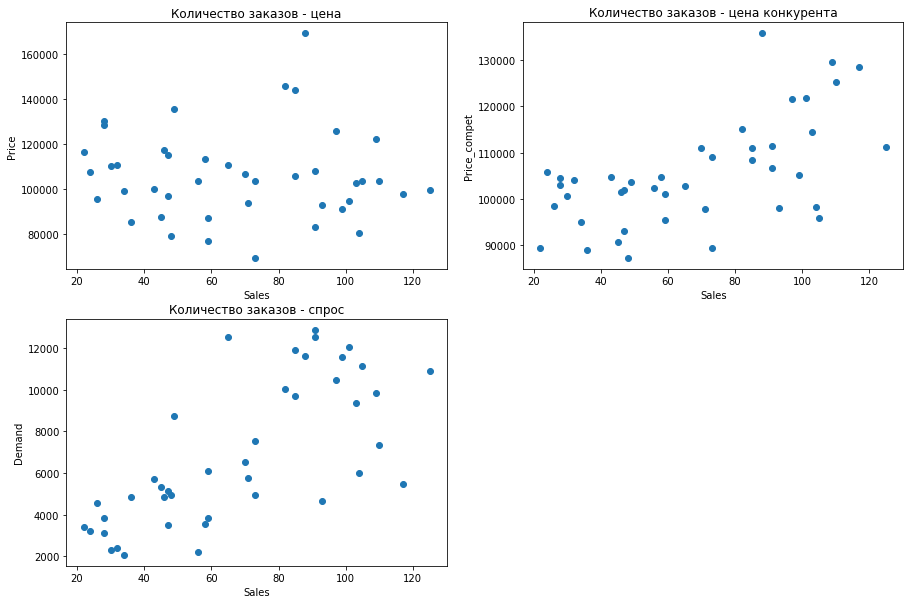

In [22]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(221)
ax.title.set_text('Количество заказов - цена')
ax.set_xlabel('Sales')
ax.set_ylabel('Price')
ax.plot(x,y,'o')
ax2 = f.add_subplot(222)
ax2.title.set_text('Количество заказов - цена конкурента')
ax2.set_xlabel('Sales')
ax2.set_ylabel('Price_compet')
ax2.plot(x,y_comp,'o')
ax3 = f.add_subplot(223)
ax3.title.set_text('Количество заказов - спрос')
ax3.set_xlabel('Sales')
ax3.set_ylabel('Demand')
ax3.plot(x,y_dem,'o')

In [23]:
#Ограничиваем выборку теми данными, которые нам известны

In [24]:
y = dat.loc[:41,'qty']
x = dat.loc[:41,['mid_price', 'mid_price_competitor', 'demand']]
x

,mid_price,mid_price_competitor,demand
0,103197.80,125185.20,7366.0
1,107808.30,111489.70,12550.0
2,92518.58,98027.54,4638.0
3,80068.75,98274.79,6002.0
4,97560.45,128452.00,5457.0
5,93533.10,97903.89,5746.0
6,105465.40,111031.70,9710.0
7,103581.30,109069.90,4954.0
8,82913.93,106719.10,12880.0
9,114749.30,93182.47,5134.0


In [25]:
#Строим временной ряд, отражающий количество продаж по времени

In [26]:
week = [i for i in range(0,42)]

Text(0, 0.5, 'Sales')

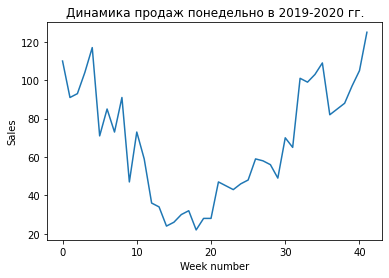

In [27]:
plt.plot(week, y)
plt.title('Динамика продаж понедельно в 2019-2020 гг.')
plt.xlabel('Week number')
plt.ylabel('Sales')

In [28]:
#Разделяем выборку на обучающую и тестовую

In [29]:
x_train = x.loc[:30]
x_test = x.loc[31:]
y_train = y.loc[:30]
y_test = y.loc[31:]
y_test=y_test.to_frame()
y_train=y_train.to_frame()

In [30]:
#Строим линейную регрессию. Нашей задачей является выявление взаимосвязи цены, продаж и спроса. С этой задачей лучше всего справляется регрессия, коэффициенты которой как раз и указывают на эту связь.

In [31]:
y_pred = regr()
y_pred

array([[ 76.83778328],
       [120.35514479],
       [ 93.47906683],
       [ 91.91315317],
       [103.96568195],
       [ 60.41463307],
       [ 57.14443963],
       [ 82.28631718],
       [ 88.97769539],
       [ 65.96864675],
       [ 94.51049793]])

In [32]:
#Обучив модель на обучающей выборке, теперь строим прогноз для тестовой выборки и сравниваем получившиеся значения с действительными

In [33]:
comp = pd.DataFrame(np.column_stack([y_test, y_pred]), dtype=int)
comp.columns = ['real_y', 'predicted_y']
print(comp)

    real_y  predicted_y
0       65           76
1      101          120
2       99           93
3      103           91
4      109          103
5       82           60
6       85           57
7       88           82
8       97           88
9      105           65
10     125           94


In [34]:
dates = dat.loc[31:41, 'period']

In [35]:
#Строим график, чтобы сравнить реальные и прогнозные значения

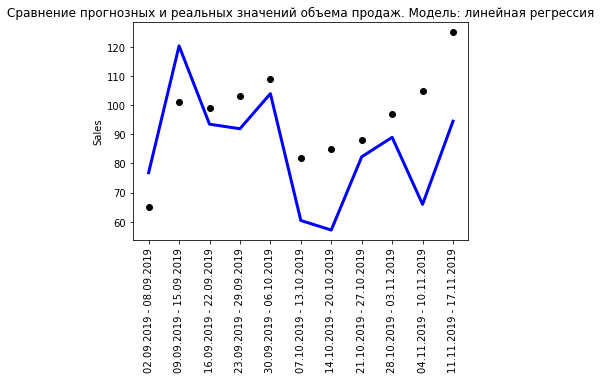

In [36]:
graphic(prediction = y_pred, title = 'Сравнение прогнозных и реальных значений объема продаж. Модель: линейная регрессия')

In [37]:
#Находим среднюю абсолютную и среднюю квадратическую ошибку. Первая свидетельствует о том, что проноз отклоняется от реальности в среднем на 17 заказов.
#В отличии от средней абсолютной, среднеквадратическая ошибка сильнее штрафует модель за выбросы в прогнозе.

In [38]:
mean_absolute_error(y_test, y_pred)

16.866617833768192

In [39]:
mean_squared_error(y_test, y_pred)

407.76528194108874

In [40]:
#К выборке были добавлены новые наблюдения: сезоны(winter, spring, summer), праздничные дни (holiday) и детские каникулы (children).

In [41]:
#Дополнительные переменные ухудшали прогноз, за исключением детских каникул, ее было решено оставить в модели.

In [42]:
x = dat.loc[:41,['mid_price', 'mid_price_competitor', 'demand', 'children']]

In [43]:
#Снова строим модель и делаем прогноз, но в этот раз включаем переменную 'children'.

In [44]:
x_train = x.loc[:30]
x_test = x.loc[31:]
y_train = y.loc[:30]
y_test = y.loc[31:]
y_test=y_test.to_frame()
y_train=y_train.to_frame()

In [45]:
y_pred = regr()

In [46]:
comp = pd.DataFrame(np.column_stack([y_test, y_pred]), dtype=int)
comp.columns = ['real_y', 'predicted_y']
print(comp)

    real_y  predicted_y
0       65           80
1      101          121
2       99           95
3      103           94
4      109          106
5       82           66
6       85           63
7       88           88
8       97           87
9      105           70
10     125           96


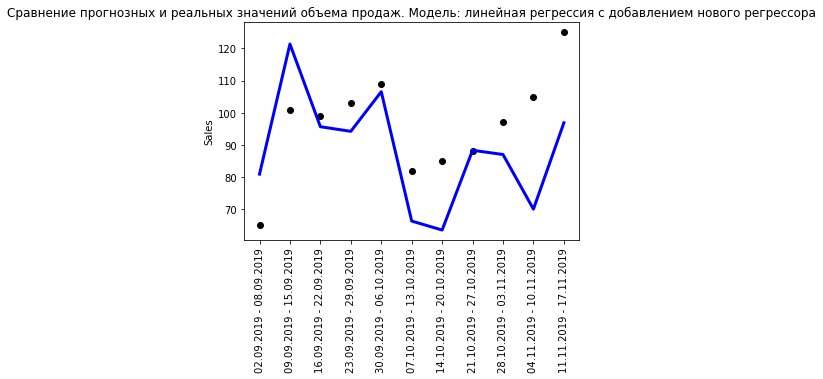

In [47]:
graphic(prediction = y_pred, title = 'Сравнение прогнозных и реальных значений объема продаж. Модель: линейная регрессия с добавлением нового регрессора')

In [48]:
#Как видно по графику и метрикам качества, описательная сила модели увеличилась. 
#Кроме того, снизилась средняя абсолютная ошибка: сейчас она равна 14,7. В том числе снизилась и среднеквадратическая ошибка.

In [49]:
mean_absolute_error(y_test, y_pred)

14.65895531732354

In [50]:
mean_squared_error(y_test, y_pred)

325.0351198906785

In [51]:
#Возможно, решение о покупке принимается сильно после того, как производится поиск тура в интернете. 
#Поэтому имеет смысл добавить лаги к переменной demand.

In [52]:
dat = pd.concat([dat, dat['demand'].shift()], axis=1)


In [53]:
dat.columns = ('period', 'mid_price', 'mid_price_competitor', 'qty', 'demand', 'temp', 'holiday', 'winter', 'spring', 'summer', 'children', 'demand_1')

In [54]:
dat = pd.concat([dat, dat['demand'].shift(2)], axis=1)
dat.columns = ('period', 'mid_price', 'mid_price_competitor', 'qty', 'demand', 'temp', 'holiday', 'winter', 'spring', 'summer', 'children', 'demand_1', 'demand_2')

In [55]:
data = dat
dat = dat.dropna()
dat.head(10)

,period,mid_price,mid_price_competitor,qty,demand,temp,holiday,winter,spring,summer,children,demand_1,demand_2
2,11.02.2019 - 17.02.2019,92518.58,98027.54,93.0,4638.0,26.714286,0,1,0,0,0,12550.0,7366.0
3,18.02.2019 - 24.02.2019,80068.75,98274.79,104.0,6002.0,25.000000,2,1,0,0,0,4638.0,12550.0
4,25.02.2019 - 03.03.2019,97560.45,128452.00,117.0,5457.0,26.571429,0,1,0,0,0,6002.0,4638.0
5,04.03.2019 - 10.03.2019,93533.10,97903.89,71.0,5746.0,24.714286,3,0,1,0,0,5457.0,6002.0
6,11.03.2019 - 17.03.2019,105465.40,111031.70,85.0,9710.0,27.000000,0,0,1,0,0,5746.0,5457.0
7,18.03.2019 - 24.03.2019,103581.30,109069.90,73.0,4954.0,27.857143,0,0,1,0,2,9710.0,5746.0
8,25.03.2019 - 31.03.2019,82913.93,106719.10,91.0,12880.0,31.857143,0,0,1,0,7,4954.0,9710.0
9,01.04.2019 - 07.04.2019,114749.30,93182.47,47.0,5134.0,37.857143,0,0,1,0,0,12880.0,4954.0
10,08.04.2019 - 14.04.2019,69152.92,89318.94,73.0,7559.0,32.285714,0,0,1,0,0,5134.0,12880.0
11,15.04.2019 - 21.04.2019,76651.25,101019.40,59.0,3851.0,35.142857,0,0,1,0,0,7559.0,5134.0


In [56]:
dat.head(10)

,period,mid_price,mid_price_competitor,qty,demand,temp,holiday,winter,spring,summer,children,demand_1,demand_2
2,11.02.2019 - 17.02.2019,92518.58,98027.54,93.0,4638.0,26.714286,0,1,0,0,0,12550.0,7366.0
3,18.02.2019 - 24.02.2019,80068.75,98274.79,104.0,6002.0,25.000000,2,1,0,0,0,4638.0,12550.0
4,25.02.2019 - 03.03.2019,97560.45,128452.00,117.0,5457.0,26.571429,0,1,0,0,0,6002.0,4638.0
5,04.03.2019 - 10.03.2019,93533.10,97903.89,71.0,5746.0,24.714286,3,0,1,0,0,5457.0,6002.0
6,11.03.2019 - 17.03.2019,105465.40,111031.70,85.0,9710.0,27.000000,0,0,1,0,0,5746.0,5457.0
7,18.03.2019 - 24.03.2019,103581.30,109069.90,73.0,4954.0,27.857143,0,0,1,0,2,9710.0,5746.0
8,25.03.2019 - 31.03.2019,82913.93,106719.10,91.0,12880.0,31.857143,0,0,1,0,7,4954.0,9710.0
9,01.04.2019 - 07.04.2019,114749.30,93182.47,47.0,5134.0,37.857143,0,0,1,0,0,12880.0,4954.0
10,08.04.2019 - 14.04.2019,69152.92,89318.94,73.0,7559.0,32.285714,0,0,1,0,0,5134.0,12880.0
11,15.04.2019 - 21.04.2019,76651.25,101019.40,59.0,3851.0,35.142857,0,0,1,0,0,7559.0,5134.0


In [57]:
x = dat.loc[:41,['mid_price', 'mid_price_competitor', 'demand_2', 'children', 'holiday']]
y = dat.loc[:41,'qty']

In [58]:
#Повторно оцениваем модель, но в данном случае зависимой переменной выступает второй лаг количества продаж. 
#Ранее дополнительно была произведена оценка с первым лагом, но не включена в данный код в целях экономии объема. 
#Проверка на второй лаг проводится по аналогии с первым. Второй лаг показал бОльшую эффективность.

In [59]:
x_train = x.loc[:30]
x_test = x.loc[31:]
y_train = y.loc[:30]
y_test = y.loc[31:]
y_test=y_test.to_frame()
y_train=y_train.to_frame()

In [60]:
y_pred = regr()

In [61]:
comp = pd.DataFrame(np.column_stack([y_test, y_pred]), dtype=int)
comp.columns = ['real_y', 'predicted_y']
print(comp)

    real_y  predicted_y
0       65           74
1      101          105
2       99          105
3      103          115
4      109          132
5       82           84
6       85           75
7       88          115
8       97          108
9      105           76
10     125          103


In [62]:
#Строим график линейной регрессии со вторым лагом переменной demand

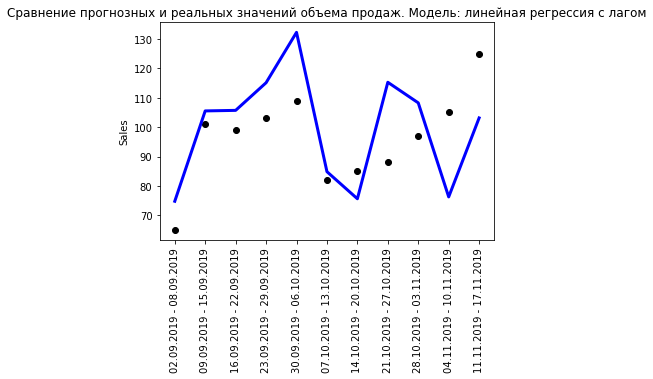

In [63]:
graphic(prediction = y_pred, title = 'Сравнение прогнозных и реальных значений объема продаж. Модель: линейная регрессия с лагом')

In [64]:
#Обе метрики качества модели показывают ее улучшение. Теперь среднее квадратическое отклонение равно 14,3. 
#Был выбран второй лаг, поскольку первый лаг не дал таких существенных результатов.
#Значит, решение о покупке принимается с интервалом в 2 недели после запроса в интернете.

In [65]:
mean_absolute_error(y_test, y_pred)

14.34268394936774

In [66]:
mean_squared_error(y_test, y_pred)

283.54310299107567

In [67]:
#В модели возможны существенные проблемы, возникающие из-за переобучения. Чтобы предотвратить подобные последствия, предлагается
#использовать регуляризацию. Начнем с L2 регуляризации, штрафующей за большие коэффициенты. Как видно, модель достаточно хорошо предсказывает
#первые значения. Средняя абсолютная ошибка уже снизилась до 10,5.

Прогнозные значения: 
 [[ 72.19592695]
 [ 96.82717283]
 [ 97.81291817]
 [104.9270375 ]
 [117.99045841]
 [ 79.33843979]
 [ 72.10981965]
 [103.00439534]
 [ 96.43669695]
 [ 73.62786043]
 [ 95.27871858]]
Коэффициенты: 
 [[-3.74213430e-04  1.45001392e-03  3.94916119e-03 -7.44135673e-01
  -2.58899065e+00]]
Средняя абсолютная ошибка:  10.516926526751394
Лучшая альфа:  0.19630406500402683


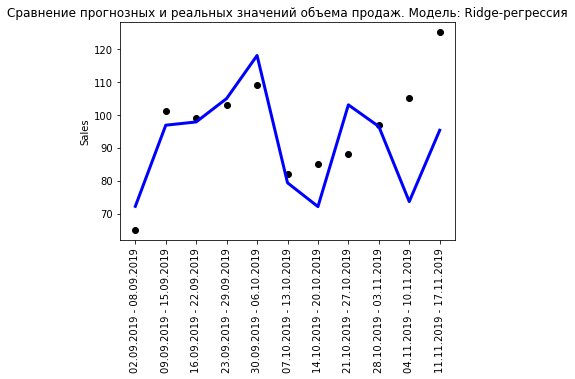

In [68]:
y_pred = choice(Ridge)
graphic(prediction = y_pred, title = 'Сравнение прогнозных и реальных значений объема продаж. Модель: Ridge-регрессия')

In [69]:
comp = pd.DataFrame(np.column_stack([y_test, y_pred]), dtype=int)
comp.columns = ['real_y', 'predicted_y']
print(comp)

    real_y  predicted_y
0       65           72
1      101           96
2       99           97
3      103          104
4      109          117
5       82           79
6       85           72
7       88          103
8       97           96
9      105           73
10     125           95


In [70]:
#Далее проводим L1 регуляризацию, обнуляющую коэффициенты при лишних переменных, тем самым упрощая модель и снижая зашумленность. 
#Из результатов видно, что L2 регуляризация продемонстрировала себя лучше всех прочих моделей.

In [71]:
#Коэффициенты ридж-регрессии указывают на то, что при росте цены на услуги компании количество продаж снижается, 
#а при росте цены конкурентов и рыночного спроса, напротив, увеличивается. Это согласуется и с экономической логикой.

Прогнозные значения: 
 [ 70.9204948   96.5870511   98.69497959 106.86503829 121.85940554
  80.38771275  72.52829417 107.33187048 107.07271383  74.54155957
  95.90814172]
Коэффициенты: 
 [-3.62852486e-04  1.57920217e-03  4.50147883e-03 -6.10075573e-03
 -1.01313436e+00]
Средняя абсолютная ошибка:  11.854707640469035
Лучшая альфа:  0.31257158496882353


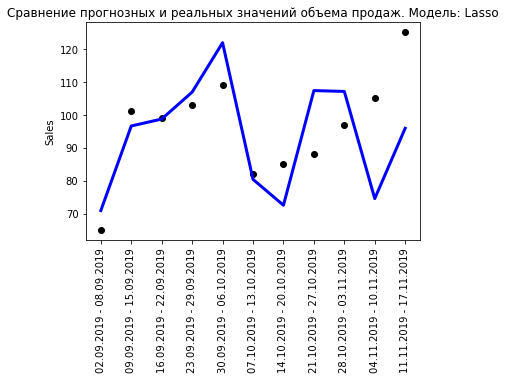

In [72]:
y_pred = choice(model=Lasso)
graphic(prediction = y_pred, title = 'Сравнение прогнозных и реальных значений объема продаж. Модель: Lasso')

In [73]:
comp = pd.DataFrame(np.column_stack([y_test, y_pred]), dtype=int)
comp.columns = ['real_y', 'predicted_y']
print(comp)

    real_y  predicted_y
0       65           70
1      101           96
2       99           98
3      103          106
4      109          121
5       82           80
6       85           72
7       88          107
8       97          107
9      105           74
10     125           95


In [74]:
x_pred = data.loc[42:,['mid_price', 'mid_price_competitor', 'demand_2', 'children', 'holiday']]
data.tail(15)

,period,mid_price,mid_price_competitor,qty,demand,temp,holiday,winter,spring,summer,children,demand_1,demand_2
37,14.10.2019 - 20.10.2019,143754.80,108358.10,85.0,11935.0,37.428571,0,0,0,0,0,10022.0,9868.0
38,21.10.2019 - 27.10.2019,168935.10,135743.50,88.0,11649.0,37.000000,0,0,0,0,0,11935.0,10022.0
39,28.10.2019 - 03.11.2019,125785.30,121518.20,97.0,10469.0,35.857143,2,0,0,0,6,11649.0,11935.0
40,04.11.2019 - 10.11.2019,103407.40,95927.21,105.0,11138.0,32.857143,1,0,0,0,0,10469.0,11649.0
41,11.11.2019 - 17.11.2019,99600.50,111304.50,125.0,10929.0,30.000000,0,0,0,0,0,11138.0,10469.0
42,18.11.2019 - 24.11.2019,106651.70,96013.79,NaN,10475.0,27.714286,0,0,0,0,0,10929.0,11138.0
43,25.11.2019 - 01.12.2019,101673.50,102984.40,NaN,9432.0,29.000000,0,0,0,0,0,10475.0,10929.0
44,02.12.2019 - 08.12.2019,123099.70,103358.10,NaN,10360.0,28.857143,0,0,0,0,0,9432.0,10475.0
45,09.12.2019 - 15.12.2019,119102.70,125948.50,NaN,11165.0,27.714286,0,0,0,0,0,10360.0,9432.0
46,16.12.2019 - 22.12.2019,101896.10,91143.04,NaN,11716.0,27.571429,0,0,0,0,0,11165.0,10360.0


In [75]:
#Поскольку ридж-регрессия продемонстрировала лучшие результаты, будем строить прогноз на ее основе.

In [76]:
final_model = Ridge(alpha = 0.1963, normalize = True)
final_model.fit(x_train, y_train)             
pred = final_model.predict(x_pred)

In [77]:
dates = data['period'].loc[42:]

In [78]:
predict = pd.DataFrame(np.column_stack([dates, pred]))
predict.columns = ['period', 'predicted_y']
print(predict)

                    period predicted_y
0  18.11.2019 - 24.11.2019     73.1104
1  25.11.2019 - 01.12.2019     84.2554
2  02.12.2019 - 08.12.2019     74.9864
3  09.12.2019 - 15.12.2019      105.12
4  16.12.2019 - 22.12.2019     64.7548
5  23.12.2019 - 29.12.2019     81.0779
6  30.12.2019 - 05.01.2020      71.266
7  06.01.2020 - 12.01.2020     81.8683
8  13.01.2020 - 19.01.2020     70.9056
9  20.01.2020 - 26.01.2020     97.4377


In [79]:
i=0
while i<10:
    predict=predict.replace(predict.loc[i, 'predicted_y'], np.round(predict.loc[i, 'predicted_y']))
    i+=1

In [80]:
#Окончательный прогноз выглядит следующим образом:

In [81]:
predict

,period,predicted_y
0,18.11.2019 - 24.11.2019,73.0
1,25.11.2019 - 01.12.2019,84.0
2,02.12.2019 - 08.12.2019,75.0
3,09.12.2019 - 15.12.2019,105.0
4,16.12.2019 - 22.12.2019,65.0
5,23.12.2019 - 29.12.2019,81.0
6,30.12.2019 - 05.01.2020,71.0
7,06.01.2020 - 12.01.2020,82.0
8,13.01.2020 - 19.01.2020,71.0
9,20.01.2020 - 26.01.2020,97.0


In [82]:
'''Стоит отметить,что не стоит сильно полагаться на данный прогноз ввиду двух главных причин: маленькому набору данных и разразившемуся 
в 2020 году коронавирусу. Поскольку подобное событие случается раз в сотню лет, у нас нет данных, чтобы оценить его влияние на 
туристический бизнес. Однако известно, что в 2020 году туристический бизнес сильно пострадал от пандемии, поскольку границы были и остаются 
закрыты. На основе этого можно сделать вывод, что реальные цифры оказались существенно ниже, если не близки к нулю.'''

'Стоит отметить,что не стоит сильно полагаться на данный прогноз ввиду двух главных причин: маленькому набору данных и разразившемуся \nв 2020 году коронавирусу. Поскольку подобное событие случается раз в сотню лет, у нас нет данных, чтобы оценить его влияние на \nтуристический бизнес. Однако известно, что в 2020 году туристический бизнес сильно пострадал от пандемии, поскольку границы были и остаются \nзакрыты. На основе этого можно сделать вывод, что реальные цифры оказались существенно ниже, если не близки к нулю.'